# Statement
size of dataset: 143604 coordinates from flicker

how I gathered data: I used flicker to scrape coordinates according to 6 keywords(Istanbul, Kadikoy, Sisli, Üsküdar, beyoglu, Fatih) 

datatype of the dataset: numeric dataset in CSV file

In [65]:
import math

In [66]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [67]:
import pandas as pd

In [68]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
istanbul = [41.005512, 28.997460]

In [70]:
coords = []
# colours = []
with open("/content/drive/MyDrive/flicker/IstanbulConsolidated_LatLong_Flickr (1).csv", 'r') as csvfile:
    reader = csv.reader(csvfile)
    for r in reader:
        # colour = [int(r[2][i:i+2], 16) for i in (0, 2, 4)]
        # colours.append(colour)
        
        coords.append([eval(r[0]), eval(r[1])])

In [71]:
coords = np.array(coords)

In [72]:
coords

array([[40.947054, 29.109467],
       [41.053466, 28.965797],
       [41.024463, 28.967514],
       ...,
       [41.063821, 28.984336],
       [41.063821, 28.984336],
       [41.063821, 28.984336]])

In [73]:
from haversine import haversine, Unit

refmain = istanbul
refsecond = coords[1]

haversine(refmain, refsecond, unit='m')


5957.10087750935

In [74]:
def convertDistToMetre(mainCoord, listofCoords):
  distances = []
  for i in listofCoords:
    distance = haversine(mainCoord, i, unit='m')
    distances.append(distance)
  return distances

In [75]:
distances = convertDistToMetre(istanbul, coords)

In [76]:
len(distances)

143604

In [77]:
def get_bearing(lat1, long1, lat2, long2):
    lat1 = np.deg2rad(lat1)
    lat2 = np.deg2rad(lat2)
    long1 = np.deg2rad(long1)
    long2 = np.deg2rad(long2)
    
    dLon = long2 - long1
    y = math.sin(dLon) * math.cos(lat2)
    x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1) * math.cos(lat2) * math.cos(dLon)
  
    brng = math.atan2(y, x)
    brng = np.rad2deg(brng)
    brng = (brng + 360) % 360

    return brng

In [78]:
get_bearing(istanbul[0], istanbul[1], coords[2][0],coords[2][1])

309.9967489012434

In [79]:
def getListOfBearings(mainCoord,coordinates):
    bearings = []
    for c in coordinates:
        lat = c[0]
        lon = c[1]
        bearing = get_bearing(mainCoord[0],mainCoord[1],lat,lon)
        bearings.append(bearing)
    return bearings

In [80]:
bearings = getListOfBearings(istanbul,coords)

In [81]:
newPoints = []
for i in range(len(bearings)):
    angle = bearings[i]
    distance = distances[i]
    px = distance * math.sin(np.deg2rad(angle))
    py = distance * math.cos(np.deg2rad(angle))
    newPoints.append([px,py])

In [82]:
newPoints

[[9407.172268895445, -6494.211229313474],
 [-2655.0023737771166, 5332.73037571379],
 [-2512.1351310424293, 2107.6887650562667],
 [-2656.310664595623, 1726.1180810855742],
 [-2656.310664595623, 1726.1180810855742],
 [-2656.310664595623, 1726.1180810855742],
 [-2656.310664595623, 1726.1180810855742],
 [-2656.310664595623, 1726.1180810855742],
 [-2512.1351310424293, 2107.6887650562667],
 [-2656.310664595623, 1726.1180810855742],
 [-2656.310664595623, 1726.1180810855742],
 [-2656.310664595623, 1726.1180810855742],
 [-726.511627782376, 1761.6996845290582],
 [-1734.6377223743252, 1819.46809907847],
 [-1734.6377223743252, 1819.46809907847],
 [-1734.6377223743252, 1819.46809907847],
 [-1734.6377223743252, 1819.46809907847],
 [1779.0549533574342, 2697.808728370486],
 [1779.0549533574342, 2697.808728370486],
 [1779.0549533574342, 2697.808728370486],
 [-4065.0348178385157, 6427.203863487129],
 [-5447.994843398357, 4585.710693298783],
 [-5447.994843398357, 4585.710693298783],
 [-5447.994843398357,

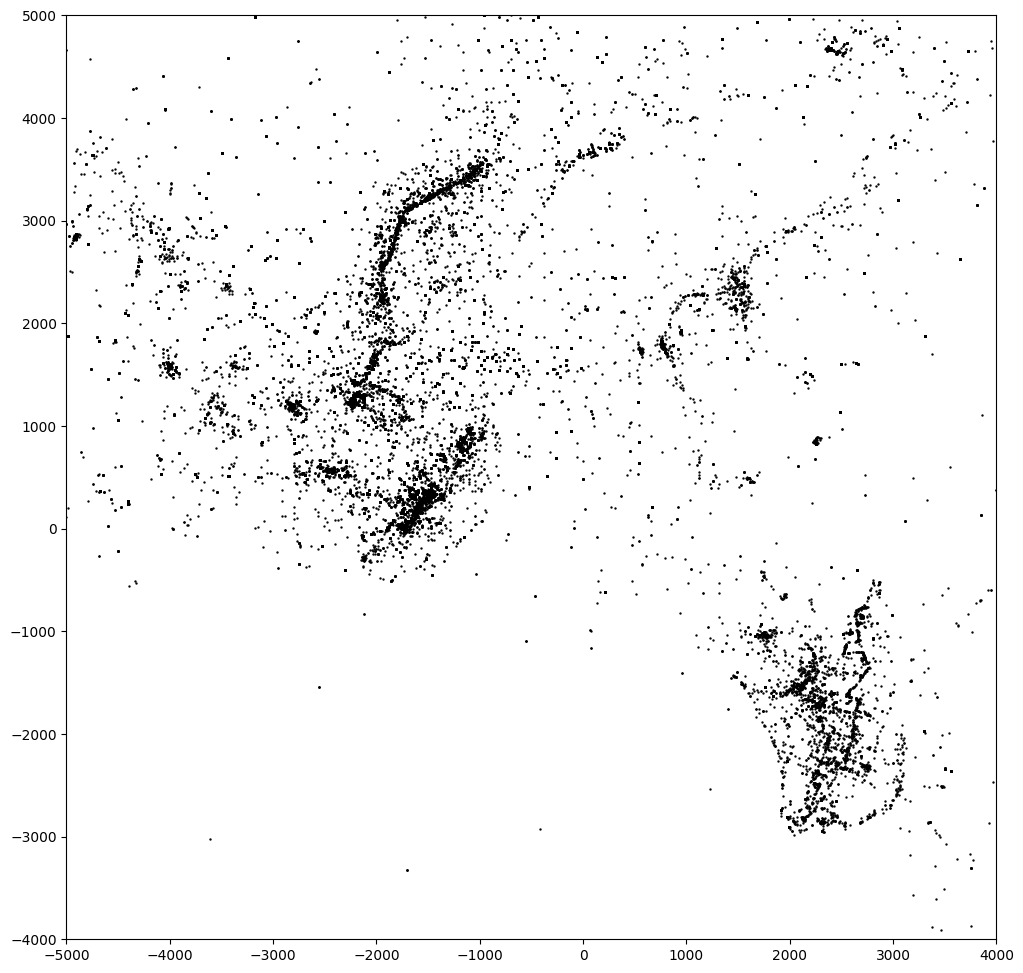

In [83]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter([p[0] for p in newPoints], [p[1] for p in newPoints], c = "black", s = 0.5)
#plt.axvline(0,c= 'black', ls = '--')
#plt.axhline(0,c= 'black', ls = '--')

plt.xlim([-5000,4000])
plt.ylim([-4000,5000])

plt.show()

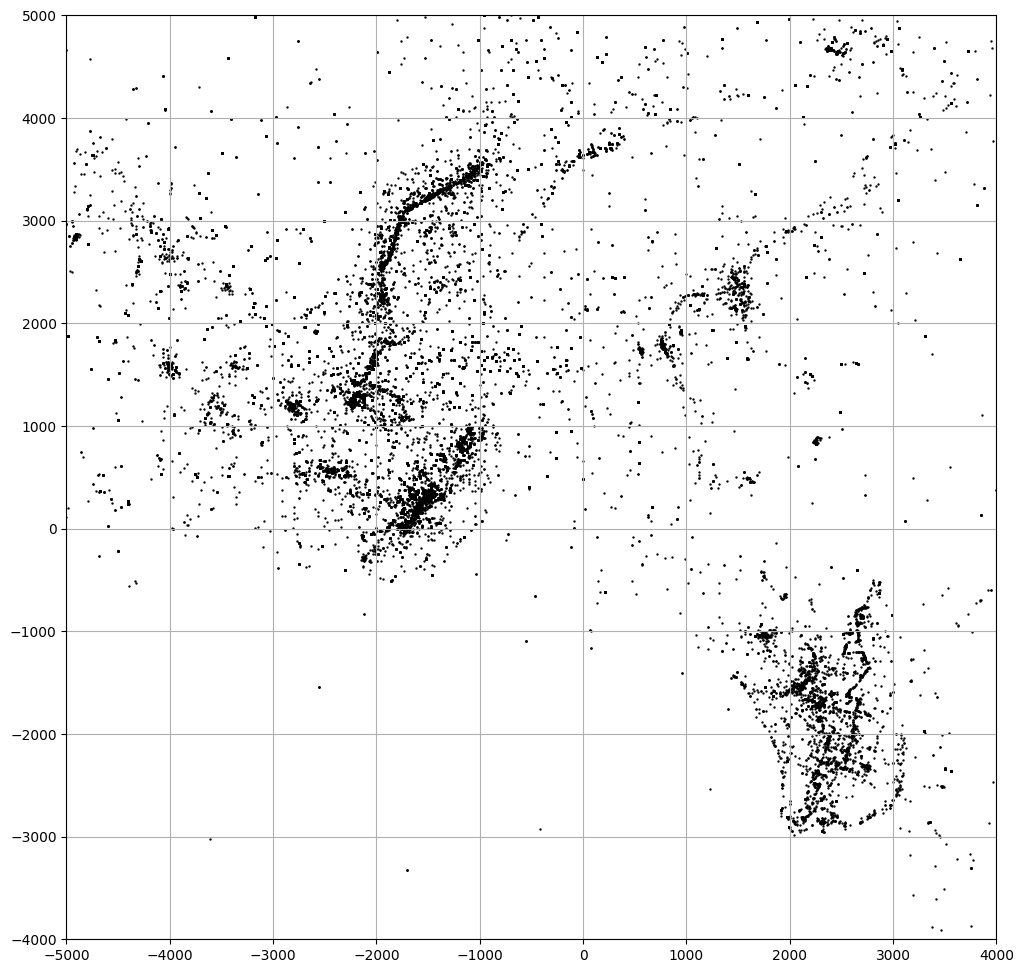

In [84]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter([p[0] for p in newPoints], [p[1] for p in newPoints], c = "black", s = 0.5)
#plt.axvline(0,c= 'black', ls = '--')
#plt.axhline(0,c= 'black', ls = '--')

plt.xlim([-5000,4000])
plt.ylim([-4000,5000])
ax.grid(True)

plt.show()

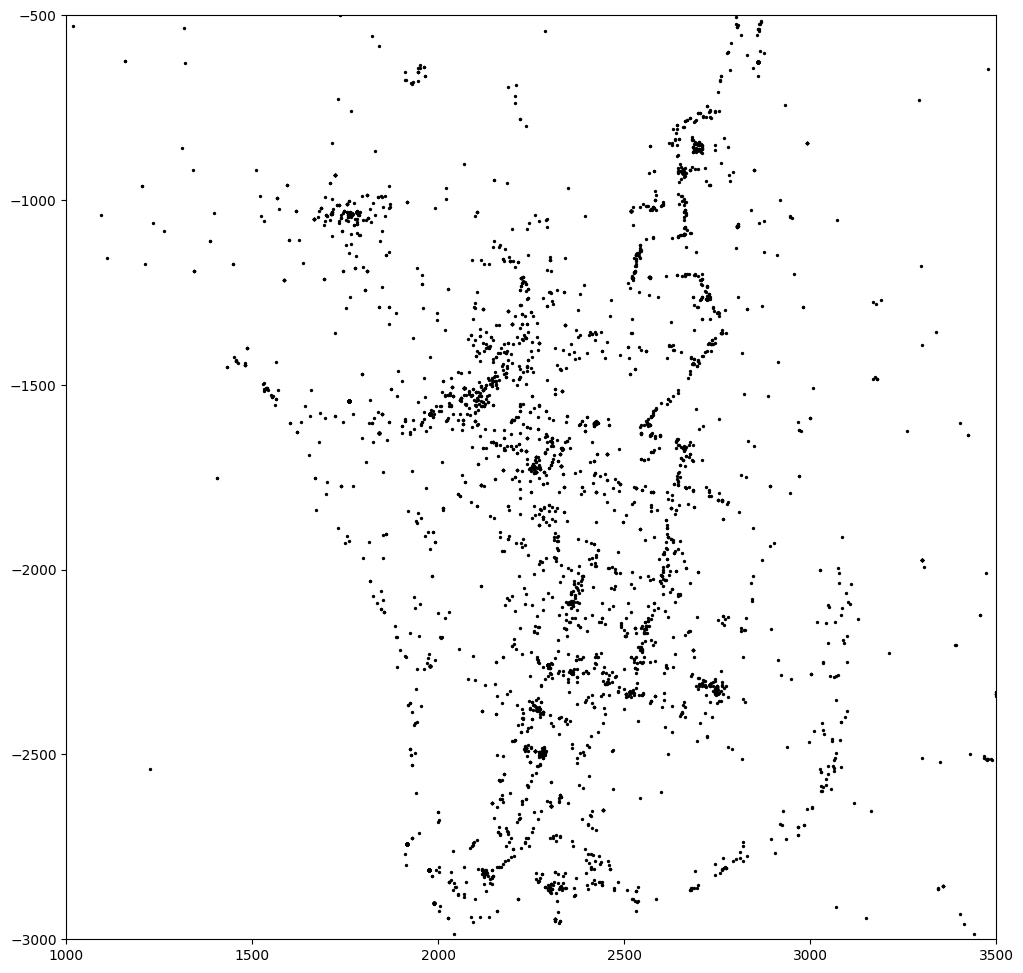

In [85]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter([p[0] for p in newPoints], [p[1] for p in newPoints], c = "black", s = 2)
#plt.axvline(0,c= 'black', ls = '--')
#plt.axhline(0,c= 'black', ls = '--')

plt.xlim([1000,3500])
plt.ylim([-3000,-500])

plt.show()

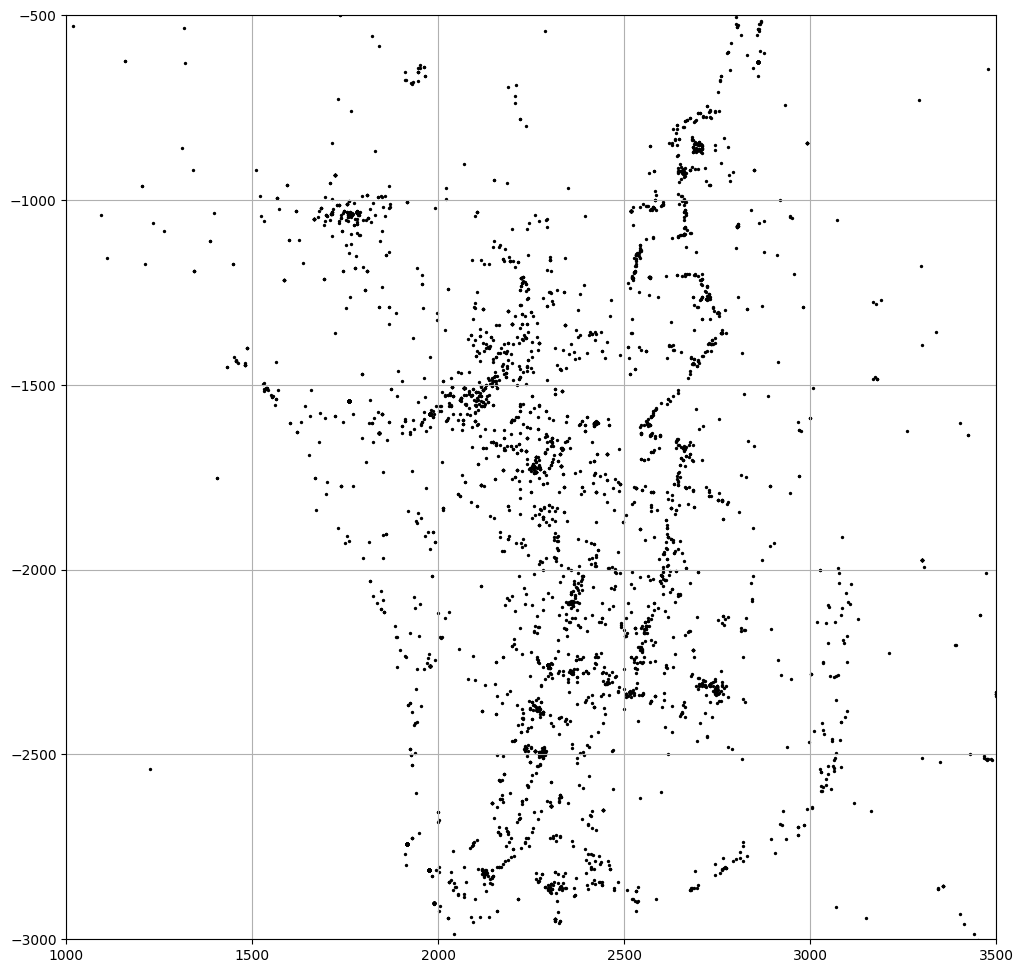

In [86]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter([p[0] for p in newPoints], [p[1] for p in newPoints], c = "black", s = 2)
#plt.axvline(0,c= 'black', ls = '--')
#plt.axhline(0,c= 'black', ls = '--')

plt.xlim([1000,3500])
plt.ylim([-3000,-500])
ax.grid(True)

plt.show()

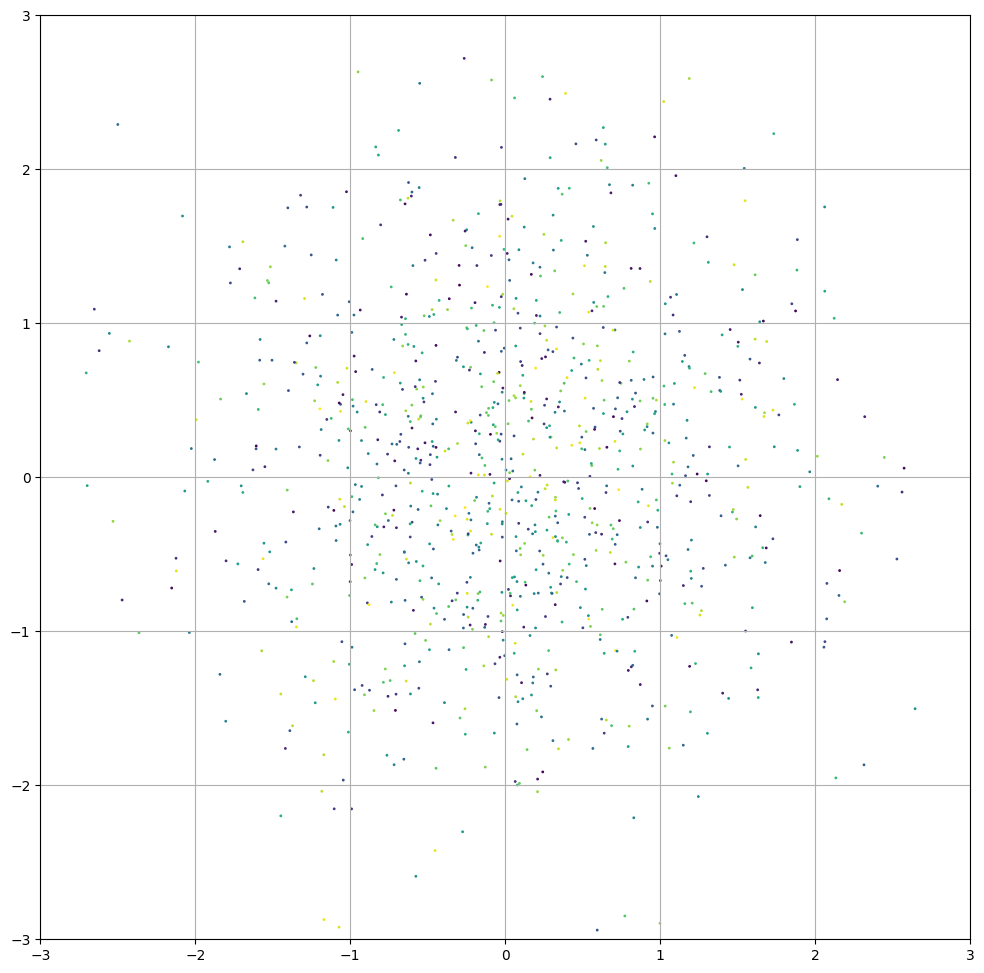

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# generate random data points
np.random.seed(42)
newPoints = np.random.normal(size=(1000, 2))
colours = np.random.randint(0, 256, size=1000)

# normalize colours
norm_colours = colours/255.0

# create scatter plot
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(newPoints[:, 0], newPoints[:, 1], c = norm_colours, s = 1)
ax.grid(True)
plt.xlim([-3,3])
plt.ylim([-3,3])

plt.show()

